In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rating: https://gopioneer.com/wp-content/uploads/2017/01/dtv_movieratings.pdf

In [2]:
data = pd.read_csv(r"D:\Python programmes\Data Collection\netflix.csv")

In [3]:
df = data.copy(deep=True)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df["date_added"]=df["date_added"].astype("datetime64")

In [8]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
for col in df.columns:
    print(col,":",df[col].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1714
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [11]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [12]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

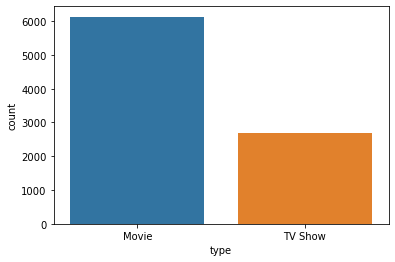

In [13]:
sns.countplot(data=df, x="type")

In [14]:
df["duration"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: duration, Length: 8807, dtype: bool

In [15]:
df[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
df[df["duration"].isna()]["show_id"].index

Int64Index([5541, 5794, 5813], dtype='int64')

In [17]:
arr = df[df["duration"].isna()]["show_id"].index

In [18]:
for idx in arr:
    df.loc[idx,"duration"]=df.loc[idx,"rating"]
    df.loc[idx,"rating"]=np.nan

In [19]:
df.loc[arr]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [20]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [21]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [22]:
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [23]:
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXxx

In [24]:
df_cp1 = df.copy(deep=True)

In [25]:
df_cp1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [26]:
df_1 = df_cp1.copy(deep=True)

## Extracting/melt director data

In [27]:
df_1["director"].apply(lambda x: x.split(",") if pd.notnull(x) else ["NA"])

0       [Kirsten Johnson]
1                    [NA]
2       [Julien Leclercq]
3                    [NA]
4                    [NA]
              ...        
8802      [David Fincher]
8803                 [NA]
8804    [Ruben Fleischer]
8805       [Peter Hewitt]
8806        [Mozez Singh]
Name: director, Length: 8807, dtype: object

In [28]:
df_1["director"].apply(lambda x: x.split(",") if pd.notnull(x) else ["NA"]).values.tolist()

[['Kirsten Johnson'],
 ['NA'],
 ['Julien Leclercq'],
 ['NA'],
 ['NA'],
 ['Mike Flanagan'],
 ['Robert Cullen', ' José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['NA'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['NA'],
 ['NA'],
 ['Pedro de Echave García', ' Pablo Azorín Williams'],
 ['NA'],
 ['Adam Salky'],
 ['NA'],
 ['Olivier Megaton'],
 ['NA'],
 ['K.S. Ravikumar'],
 ['Alex Woo', ' Stanley Moore'],
 ['S. Shankar'],
 ['NA'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', ' Abhishek Chaubey', ' Saket Chaudhary'],
 ['NA'],
 ['NA'],
 ['NA'],
 ['NA'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['NA'],
 ['George Nolfi'],
 ['NA'],
 ['NA'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['NA'],
 ['NA'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 ['Toshiya Shin

In [29]:
extract_dir = df_1["director"].apply(lambda x: x.split(",") 
                                     if pd.notnull(x) 
                                     else ["NA"]).values.tolist()

In [30]:
data_dir = pd.DataFrame(extract_dir,index=df_1["title"]).reset_index()

In [31]:
data_dir.head()

,title,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
1,Blood & Water,NA,None,None,None,None,None,None,None,None,None,None,None,None
2,Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
3,Jailbirds New Orleans,NA,None,None,None,None,None,None,None,None,None,None,None,None
4,Kota Factory,NA,None,None,None,None,None,None,None,None,None,None,None,None


In [32]:
data_dir = data_dir.melt(id_vars="title", var_name="col", value_name="director")

In [33]:
data_dir

,title,col,director
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,NA
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,NA
4,Kota Factory,0,NA
...,...,...,...
114486,Zodiac,12,None
114487,Zombie Dumb,12,None
114488,Zombieland,12,None
114489,Zoom,12,None


In [34]:
data_dir["director"].isna().sum()

104879

In [35]:
data_dir.dropna(inplace=True)

In [36]:
data_dir.drop(columns=["col"],inplace=True)

In [37]:
data_dir

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NA
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NA
4,Kota Factory,NA
...,...,...
95585,Movie 43,Rusty Cundieff
102764,Walt Disney Animation Studios Short Films Coll...,Mike Gabriel
103787,HALO Legends,Hiroshi Yamazaki
104392,Movie 43,James Gunn


## Extract/melt actor/cast data

In [38]:
df_1["cast"].apply(lambda x: x.split(",") if pd.notnull(x) else ["NA"])

0                                                    [NA]
1       [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2       [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
3                                                    [NA]
4       [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
                              ...                        
8802    [Mark Ruffalo,  Jake Gyllenhaal,  Robert Downe...
8803                                                 [NA]
8804    [Jesse Eisenberg,  Woody Harrelson,  Emma Ston...
8805    [Tim Allen,  Courteney Cox,  Chevy Chase,  Kat...
8806    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
Name: cast, Length: 8807, dtype: object

In [39]:
df_1["cast"].apply(lambda x: x.split(",") if pd.notnull(x) else ["NA"]).values.tolist()

[['NA'],
 ['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Cindy Mahlangu',
  ' Ryle De Morny',
  ' Greteli Fincham',
  ' Sello Maake Ka-Ncube',
  ' Odwa Gwanya',
  ' Mekaila Mathys',
  ' Sandi Schultz',
  ' Duane Williams',
  ' Shamilla Miller',
  ' Patrick Mofokeng'],
 ['Sami Bouajila',
  ' Tracy Gotoas',
  ' Samuel Jouy',
  ' Nabiha Akkari',
  ' Sofia Lesaffre',
  ' Salim Kechiouche',
  ' Noureddine Farihi',
  ' Geert Van Rampelberg',
  ' Bakary Diombera'],
 ['NA'],
 ['Mayur More',
  ' Jitendra Kumar',
  ' Ranjan Raj',
  ' Alam Khan',
  ' Ahsaas Channa',
  ' Revathi Pillai',
  ' Urvi Singh',
  ' Arun Kumar'],
 ['Kate Siegel',
  ' Zach Gilford',
  ' Hamish Linklater',
  ' Henry Thomas',
  ' Kristin Lehman',
  ' Samantha Sloyan',
  ' Igby Rigney',
  ' Rahul Kohli',
  ' Annarah Cymone',
  ' Annabeth Gish',
  ' Alex Essoe',
  ' Rahul Abburi',
  ' Matt

In [40]:
extract_actor = df_1["cast"].apply(lambda x: x.split(",") 
                                   if pd.notnull(x) 
                                   else ["NA"]).values.tolist()

In [41]:
data_actor = pd.DataFrame(extract_actor,index=df_1["title"]).reset_index()

In [42]:
data_actor

,title,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,Dick Johnson Is Dead,NA,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,...,None,None,None,None,None,None,None,None,None,None
2,Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,...,None,None,None,None,None,None,None,None,None,None
3,Jailbirds New Orleans,NA,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,...,None,None,None,None,None,None,None,None,None,None
8803,Zombie Dumb,NA,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8804,Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,Zoom,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,...,None,None,None,None,None,None,None,None,None,None


In [43]:
data_actor = data_actor.melt(id_vars="title",var_name="col",value_name="actor")

In [44]:
data_actor.drop(columns=["col"],inplace=True)

In [45]:
data_actor.dropna(inplace=True)

In [46]:
data_actor

,title,actor
0,Dick Johnson Is Dead,NA
1,Blood & Water,Ama Qamata
2,Ganglands,Sami Bouajila
3,Jailbirds New Orleans,NA
4,Kota Factory,Mayur More
...,...,...
417703,Black Mirror,Jon Hamm
424590,Social Distance,Ayize Ma'at
426510,Black Mirror,Oona Chaplin
433397,Social Distance,Lovie Simone


## Extracting showtype

In [47]:
dfa = df_cp1.copy(deep=True)

In [48]:
dfa["listed_in"].apply(lambda x: x.split(",") if pd.notnull(x) else ["NA"]).values.tolist()

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movies', ' Comedies'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Documentaries', ' International Movies'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['Crime TV Shows', '

In [49]:
extract_type = dfa["listed_in"].apply(lambda x: x.split(",") 
                                      if pd.notnull(x) 
                                      else ["NA"]).values.tolist()

In [50]:
pd.DataFrame(extract_type, index=dfa["title"]).reset_index().head()

,title,0,1,2
0,Dick Johnson Is Dead,Documentaries,None,None
1,Blood & Water,International TV Shows,TV Dramas,TV Mysteries
2,Ganglands,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Jailbirds New Orleans,Docuseries,Reality TV,None
4,Kota Factory,International TV Shows,Romantic TV Shows,TV Comedies


In [51]:
data_type = pd.DataFrame(extract_type, index=dfa["title"]).reset_index()

In [52]:
data_type = data_type.melt(id_vars="title",var_name="col",value_name="genre")

In [53]:
data_type.dropna(inplace=True)

In [54]:
data_type.drop(columns=["col"],inplace=True)

In [55]:
data_type

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Ganglands,Crime TV Shows
3,Jailbirds New Orleans,Docuseries
4,Kota Factory,International TV Shows
...,...,...
26414,Zindagi Gulzar Hai,TV Dramas
26415,Zinzana,Thrillers
26416,Zodiac,Thrillers
26417,Zombie Dumb,TV Comedies


## Extracting Country

In [56]:
dfa["country"].apply(lambda x: x.split(",") if pd.notnull(x) else ["NA"]).values.tolist()

[['United States'],
 ['South Africa'],
 ['NA'],
 ['NA'],
 ['India'],
 ['NA'],
 ['NA'],
 ['United States',
  ' Ghana',
  ' Burkina Faso',
  ' United Kingdom',
  ' Germany',
  ' Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['NA'],
 ['NA'],
 ['Germany', ' Czech Republic'],
 ['NA'],
 ['NA'],
 ['United States'],
 ['NA'],
 ['Mexico'],
 ['NA'],
 ['NA'],
 ['NA'],
 ['Turkey'],
 ['NA'],
 ['NA'],
 ['India'],
 ['Australia'],
 ['NA'],
 ['United States'],
 ['United States'],
 ['United States', ' India', ' France'],
 ['NA'],
 ['NA'],
 ['United Kingdom'],
 ['NA'],
 ['NA'],
 ['NA'],
 ['NA'],
 ['Finland'],
 ['China', ' Canada', ' United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['NA'],
 ['South Africa', ' United States', ' Japan'],
 ['NA'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['

In [57]:
extract_country = dfa["country"].apply(lambda x: x.split(",") 
                                       if pd.notnull(x) 
                                       else ["NA"]).values.tolist()

In [58]:
pd.DataFrame(extract_country, index=dfa["title"]).reset_index().head()

,title,0,1,2,3,4,5,6,7,8,9,10,11
0,Dick Johnson Is Dead,United States,None,None,None,None,None,None,None,None,None,None,None
1,Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,Ganglands,NA,None,None,None,None,None,None,None,None,None,None,None
3,Jailbirds New Orleans,NA,None,None,None,None,None,None,None,None,None,None,None
4,Kota Factory,India,None,None,None,None,None,None,None,None,None,None,None


In [59]:
data_country = pd.DataFrame(extract_country, index=dfa["title"]).reset_index()

In [60]:
data_country = data_country.melt(id_vars="title", var_name="col", value_name="country")

In [61]:
data_country.drop(columns=["col"],inplace=True)

In [62]:
data_country.tail(60)

,title,country
105624,Winsanity,None
105625,Winter of Our Dreams,None
105626,Winter Sun,None
105627,Winter's Bone,None
105628,Wish I Was Here,None
105629,Wish Man,None
105630,Withdrawn,None
105631,Wolves,None
105632,Women Behind Bars,None
105633,Woodstock,None


In [63]:
data_country.dropna(inplace=True)

In [64]:
data_country.replace("NA",np.nan,inplace=True)

In [65]:
data_country[data_country["country"]==""]

,title,country
193,D.P.,
365,Eyes of a Thief,
9999,The Present,
13460,City of Joy,
14732,Virunga,
15814,Hotel Pacific,
37452,Funan,


In [66]:
data_country.replace("",np.nan,inplace=True)

In [67]:
data_country.dropna(inplace=True)

In [68]:
data_country["country"].value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Slovakia            1
 Ukraine             1
 Bermuda             1
 Armenia             1
 Mongolia            1
Name: country, Length: 196, dtype: int64

In [69]:
data_country["country"]=data_country["country"].apply(lambda x: x[1:] if x[0]==" " else x)

In [70]:
data_country["country"].value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Armenia              1
Sri Lanka            1
Cuba                 1
Nicaragua            1
Mongolia             1
Name: country, Length: 122, dtype: int64

## Merging data

In [71]:
# merging director data

In [72]:
dfb=df_1

In [73]:
dfc = dfb.merge(data_dir,on="title",how="left")

In [74]:
dfc.drop(columns=["director_x"],inplace=True)

In [75]:
dfc.rename(columns={"director_y":"director"},inplace=True)

In [76]:
dfc

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,director
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NA
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NA
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NA
...,...,...,...,...,...,...,...,...,...,...,...,...
9607,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",David Fincher
9608,s8804,TV Show,Zombie Dumb,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NA
9609,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Ruben Fleischer
9610,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Peter Hewitt


In [77]:
# merging actor/cast data

In [78]:
data_actor

,title,actor
0,Dick Johnson Is Dead,NA
1,Blood & Water,Ama Qamata
2,Ganglands,Sami Bouajila
3,Jailbirds New Orleans,NA
4,Kota Factory,Mayur More
...,...,...
417703,Black Mirror,Jon Hamm
424590,Social Distance,Ayize Ma'at
426510,Black Mirror,Oona Chaplin
433397,Social Distance,Lovie Simone


In [79]:
dfc = dfc.merge(data_actor, on="title",how="left")

In [80]:
dfc.drop(columns=["cast"],inplace=True)

In [81]:
dfc

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,director,actor
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,NA
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NA,Ama Qamata
2,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema
3,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NA,Gail Mabalane
4,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NA,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...
70807,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Manish Chaudhary
70808,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Meghna Malik
70809,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Malkeet Rauni
70810,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish


In [82]:
# merging genre data

In [83]:
dfc = dfc.merge(data_type, on="title", how="left")

In [84]:
dfc = dfc.drop(columns=["listed_in"], inplace=False)

In [85]:
dfc

,show_id,type,title,country,date_added,release_year,rating,duration,description,director,actor,genre
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NA,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
161211,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,International Movies
161212,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,Music & Musicals
161213,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,Dramas
161214,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,International Movies


In [86]:
# merging country data

In [87]:
dfc = dfc.merge(data_country, on="title", how="left")

In [88]:
dfc.head(20)

,show_id,type,title,country_x,date_added,release_year,rating,duration,description,director,actor,genre,country_y
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NA,Documentaries,United States
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema,International TV Shows,South Africa
5,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema,TV Dramas,South Africa
6,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema,TV Mysteries,South Africa
7,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Gail Mabalane,International TV Shows,South Africa
8,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Gail Mabalane,TV Dramas,South Africa
9,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Gail Mabalane,TV Mysteries,South Africa


In [89]:
dfc.drop(columns=["country_x"],inplace=True)

In [90]:
dfc.rename(columns={"country_y":"country"},inplace=True)

In [91]:
dfc["country"].value_counts()

United States     59350
India             22814
United Kingdom    12965
Japan              8679
France             8254
                  ...  
Palestine             2
Samoa                 2
Nicaragua             1
Kazakhstan            1
Uganda                1
Name: country, Length: 122, dtype: int64

## final data frame  [ removing extra space from genre/actorNames/directorNames]

In [92]:
df_final = dfc.copy(deep=True)

In [93]:
df_final.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,actor,genre,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NA,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema,International TV Shows,South Africa


In [94]:
df_final["genre"].value_counts()

 International Movies    27101
Dramas                   19627
Comedies                 13894
Action & Adventure       12216
 Dramas                  10140
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: genre, Length: 73, dtype: int64

In [95]:
# "Drama" and " Drama" are at two places which need correction, and similar correction for others

In [96]:
df_final["genre"]=df_final["genre"].apply(lambda x: x[1:] if x[0]==" " else x)

In [97]:
df_final["genre"].value_counts()

Dramas                          29767
International Movies            28203
Comedies                        20829
International TV Shows          12841
Action & Adventure              12216
Independent Movies               9826
Children & Family Movies         9771
TV Dramas                        8938
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [98]:
#similarly for actors and directors

In [99]:
df_final["actor"]=df_final["actor"].apply(lambda x: x[1:] if x[0]==" " else x)

In [100]:
df_final["director"]=df_final["director"].apply(lambda x: x[1:] if x[0]==" " else x)

# Analysis

In [101]:
data_actor["actor"].value_counts().to_frame()

,actor
NA,825
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
...,...
Sean Quan,1
Rodney Carrington,1
Brenna Sherman,1
Seidy Lopez,1


In [102]:
mask = df_final[["title","actor"]].duplicated()

In [103]:
df_final[["actor"]][~mask]["actor"].value_counts().to_frame()

,actor
NA,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
...,...
Melanie Straub,1
Gabriela Maria Schmeide,1
Helena Zengel,1
Daniel Valenzuela,1


## finding actor MaxShows year wise [overall]

In [104]:
df_final["date_added"].min()

Timestamp('2008-01-01 00:00:00')

In [105]:
df_final["date_added"].max()

Timestamp('2021-09-25 00:00:00')

In [106]:
mask2 = df_final[["title","actor"]].duplicated()

In [107]:
df_A = df_final[["title","actor","date_added"]][~mask]

In [108]:
df_A["year"]=df_A["date_added"].dt.year

In [109]:
df_A

,title,actor,date_added,year
0,Dick Johnson Is Dead,NA,2021-09-25,2021.0
1,Blood & Water,Ama Qamata,2021-09-24,2021.0
4,Blood & Water,Khosi Ngema,2021-09-24,2021.0
7,Blood & Water,Gail Mabalane,2021-09-24,2021.0
10,Blood & Water,Thabang Molaba,2021-09-24,2021.0
...,...,...,...,...
201944,Zubaan,Manish Chaudhary,2019-03-02,2019.0
201947,Zubaan,Meghna Malik,2019-03-02,2019.0
201950,Zubaan,Malkeet Rauni,2019-03-02,2019.0
201953,Zubaan,Anita Shabdish,2019-03-02,2019.0


In [110]:
for col in df_A.columns:
    print(col,":",df_A[col].nunique())

title : 8807
actor : 36440
date_added : 1714
year : 14


In [111]:
df_A["date_added"].isnull()

0         False
1         False
4         False
7         False
10        False
          ...  
201944    False
201947    False
201950    False
201953    False
201956    False
Name: date_added, Length: 64949, dtype: bool

In [112]:
df_A[df_A["date_added"].isnull()]

,title,actor,date_added,year
136861,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,NaT,NaN
136864,A Young Doctor's Notebook and Other Stories,Jon Hamm,NaT,NaN
136867,A Young Doctor's Notebook and Other Stories,Adam Godley,NaT,NaN
136870,A Young Doctor's Notebook and Other Stories,Christopher Godwin,NaT,NaN
136873,A Young Doctor's Notebook and Other Stories,Rosie Cavaliero,NaT,NaN
...,...,...,...,...
186854,The Adventures of Figaro Pho,Luke Jurevicius,NaT,NaN
186856,The Adventures of Figaro Pho,Craig Behenna,NaT,NaN
186858,The Adventures of Figaro Pho,Charlotte Hamlyn,NaT,NaN
186860,The Adventures of Figaro Pho,Stavroula Mountzouris,NaT,NaN


In [113]:
df_A.dropna(inplace=True)

In [114]:
df_A["year"]=df_A["year"].astype("int")

In [115]:
df_A = df_A[df_A["actor"]!="NA"]

In [116]:
df_A

,title,actor,date_added,year
1,Blood & Water,Ama Qamata,2021-09-24,2021
4,Blood & Water,Khosi Ngema,2021-09-24,2021
7,Blood & Water,Gail Mabalane,2021-09-24,2021
10,Blood & Water,Thabang Molaba,2021-09-24,2021
13,Blood & Water,Dillon Windvogel,2021-09-24,2021
...,...,...,...,...
201944,Zubaan,Manish Chaudhary,2019-03-02,2019
201947,Zubaan,Meghna Malik,2019-03-02,2019
201950,Zubaan,Malkeet Rauni,2019-03-02,2019
201953,Zubaan,Anita Shabdish,2019-03-02,2019


In [117]:
df_A.describe(include="object")

,title,actor
count,64055,64055
unique,7972,36403
top,Social Distance,Anupam Kher
freq,50,43


In [118]:
df_A.groupby(["year"])["actor"].count()

year
2008        6
2009       18
2010       10
2011      101
2012       19
2013       67
2014      128
2015      526
2016     2710
2017     7612
2018    10941
2019    15075
2020    14776
2021    12066
Name: actor, dtype: int64

In [119]:
df_A[df_A["year"]==2013]["actor"].value_counts()

Russell Peters        3
Brian d'Arcy James    1
Dean Norris           1
R.J. Mitte            1
Bob Odenkirk          1
                     ..
Richard Kahan         1
Mahershala Ali        1
Billy Campbell        1
Bryan Cranston        1
Frank O'Sullivan      1
Name: actor, Length: 65, dtype: int64

In [120]:
arr = df_A["year"].unique()

In [121]:
arr.sort()

In [122]:
arr

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [123]:
arrA = []

In [124]:
for el in arr:
    x = df_A[df_A["year"]==el]["actor"].value_counts().index[0]
    y = df_A[df_A["year"]==el]["actor"].value_counts().values[0]
    temp = [el,x,y]
    arrA.append(temp)

In [125]:
arrA

[[2008, 'Barbara King', 1],
 [2009, 'Corey Feldman', 1],
 [2010, 'Nick Pawlow', 1],
 [2011, 'Judith Light', 3],
 [2012, 'Kevin Clash', 1],
 [2013, 'Russell Peters', 3],
 [2014, 'Adrian Pasdar', 2],
 [2015, 'David Attenborough', 5],
 [2016, 'Paul Schrier', 9],
 [2017, 'Shah Rukh Khan', 14],
 [2018, 'Anupam Kher', 19],
 [2019, 'Samuel L. Jackson', 11],
 [2020, 'Hassan Hosny', 12],
 [2021, 'Rupa Bhimani', 22]]

In [126]:
data_A = pd.DataFrame(arrA,columns=["year","actor","MaxShows"])

In [127]:
data_A

,year,actor,MaxShows
0,2008,Barbara King,1
1,2009,Corey Feldman,1
2,2010,Nick Pawlow,1
3,2011,Judith Light,3
4,2012,Kevin Clash,1
5,2013,Russell Peters,3
6,2014,Adrian Pasdar,2
7,2015,David Attenborough,5
8,2016,Paul Schrier,9
9,2017,Shah Rukh Khan,14


<AxesSubplot:xlabel='actor', ylabel='MaxShows'>

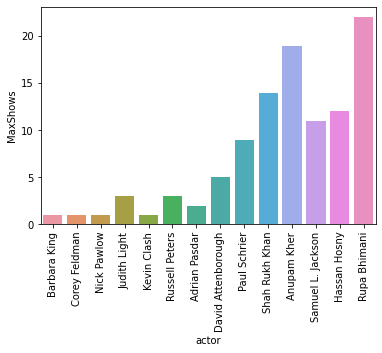

In [128]:
plt.xticks(rotation=90)
sns.barplot(data=data_A,x="actor",y="MaxShows")

## extracting data for TVshows and movies [ in India ]

In [129]:
df_final

,show_id,type,title,date_added,release_year,rating,duration,description,director,actor,genre,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NA,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
201954,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,International Movies,India
201955,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,Music & Musicals,India
201956,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201957,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [130]:
df_B = df_final[["type","title","country","date_added","actor","genre","rating"]]

In [131]:
df_B

,type,title,country,date_added,actor,genre,rating
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,NA,Documentaries,PG-13
1,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,International TV Shows,TV-MA
2,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,TV Dramas,TV-MA
3,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,TV Mysteries,TV-MA
4,TV Show,Blood & Water,South Africa,2021-09-24,Khosi Ngema,International TV Shows,TV-MA
...,...,...,...,...,...,...,...
201954,Movie,Zubaan,India,2019-03-02,Anita Shabdish,International Movies,TV-14
201955,Movie,Zubaan,India,2019-03-02,Anita Shabdish,Music & Musicals,TV-14
201956,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,Dramas,TV-14
201957,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,International Movies,TV-14


In [132]:
df_B.isna().sum()

type              0
title             0
country       11897
date_added      158
actor             0
genre             0
rating           70
dtype: int64

In [133]:
df_B.dropna(inplace=True)

C:\Users\Shadab Alam\AppData\Local\Temp\ipykernel_4344\1481038785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B.dropna(inplace=True)


In [134]:
df_B.isna().sum()

type          0
title         0
country       0
date_added    0
actor         0
genre         0
rating        0
dtype: int64

In [135]:
df_B = df_B[df_B["actor"]!="NA"]

In [136]:
df_B

,type,title,country,date_added,actor,genre,rating
1,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,International TV Shows,TV-MA
2,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,TV Dramas,TV-MA
3,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,TV Mysteries,TV-MA
4,TV Show,Blood & Water,South Africa,2021-09-24,Khosi Ngema,International TV Shows,TV-MA
5,TV Show,Blood & Water,South Africa,2021-09-24,Khosi Ngema,TV Dramas,TV-MA
...,...,...,...,...,...,...,...
201954,Movie,Zubaan,India,2019-03-02,Anita Shabdish,International Movies,TV-14
201955,Movie,Zubaan,India,2019-03-02,Anita Shabdish,Music & Musicals,TV-14
201956,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,Dramas,TV-14
201957,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,International Movies,TV-14


In [137]:
df_B["year"]=df_B["date_added"].dt.year.astype("int")

C:\Users\Shadab Alam\AppData\Local\Temp\ipykernel_4344\87671534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B["year"]=df_B["date_added"].dt.year.astype("int")


In [138]:
df_B

,type,title,country,date_added,actor,genre,rating,year
1,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,International TV Shows,TV-MA,2021
2,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,TV Dramas,TV-MA,2021
3,TV Show,Blood & Water,South Africa,2021-09-24,Ama Qamata,TV Mysteries,TV-MA,2021
4,TV Show,Blood & Water,South Africa,2021-09-24,Khosi Ngema,International TV Shows,TV-MA,2021
5,TV Show,Blood & Water,South Africa,2021-09-24,Khosi Ngema,TV Dramas,TV-MA,2021
...,...,...,...,...,...,...,...,...
201954,Movie,Zubaan,India,2019-03-02,Anita Shabdish,International Movies,TV-14,2019
201955,Movie,Zubaan,India,2019-03-02,Anita Shabdish,Music & Musicals,TV-14,2019
201956,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,Dramas,TV-14,2019
201957,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,International Movies,TV-14,2019


In [139]:
df_TVshow = df_B[df_B["type"]=="TV Show"]

In [140]:
df_Movie = df_B[df_B["type"]=="Movie"]

## TV shows Vs Movies in India

In [141]:
df_B["country"].value_counts()

United States     58520
India             22717
United Kingdom    12711
Japan              8575
France             8172
                  ...  
Vatican City          3
Afghanistan           2
Panama                2
Sri Lanka             2
Nicaragua             1
Name: country, Length: 115, dtype: int64

In [142]:
df_India_raw = df_B[df_B["country"]=="India"]

In [143]:
df_India_raw.duplicated().sum()

1651

In [144]:
df_India_raw.drop_duplicates(keep="first",inplace=True)

C:\Users\Shadab Alam\AppData\Local\Temp\ipykernel_4344\4129353636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India_raw.drop_duplicates(keep="first",inplace=True)


In [145]:
df_India = df_India_raw.copy(deep=True)

In [146]:
df_India

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
88,TV Show,Kota Factory,India,2021-09-24,Mayur More,Romantic TV Shows,TV-MA,2021
89,TV Show,Kota Factory,India,2021-09-24,Mayur More,TV Comedies,TV-MA,2021
90,TV Show,Kota Factory,India,2021-09-24,Jitendra Kumar,International TV Shows,TV-MA,2021
91,TV Show,Kota Factory,India,2021-09-24,Jitendra Kumar,Romantic TV Shows,TV-MA,2021
...,...,...,...,...,...,...,...,...
201954,Movie,Zubaan,India,2019-03-02,Anita Shabdish,International Movies,TV-14,2019
201955,Movie,Zubaan,India,2019-03-02,Anita Shabdish,Music & Musicals,TV-14,2019
201956,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,Dramas,TV-14,2019
201957,Movie,Zubaan,India,2019-03-02,Chittaranjan Tripathy,International Movies,TV-14,2019


In [147]:
maskA = df_India[["type","title"]].duplicated(keep="first")

In [148]:
df_type = df_India[~maskA]

In [149]:
df_type.duplicated().sum()

0

In [150]:
df_type.head()

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
641,Movie,Jeans,India,2021-09-21,Prashanth,Comedies,TV-14,2021
706,Movie,Paranoia,India,2021-09-19,Liam Hemsworth,Thrillers,PG-13,2021
989,TV Show,Chhota Bheem,India,2021-09-16,Vatsal Dubey,Kids' TV,TV-Y7,2021
1243,TV Show,Dharmakshetra,India,2021-09-15,Kashmira Irani,International TV Shows,TV-PG,2021


In [151]:
arr1 = df_type["year"].unique()

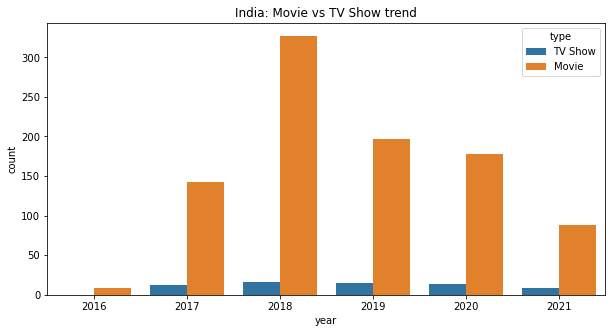

In [152]:
plt.figure(figsize=(10,5))
plt.title("India: Movie vs TV Show trend")
sns.countplot(data=df_type, x="year",hue="type")
plt.show()

## India Movie: prefered genre type

In [153]:
df_India.head()

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
88,TV Show,Kota Factory,India,2021-09-24,Mayur More,Romantic TV Shows,TV-MA,2021
89,TV Show,Kota Factory,India,2021-09-24,Mayur More,TV Comedies,TV-MA,2021
90,TV Show,Kota Factory,India,2021-09-24,Jitendra Kumar,International TV Shows,TV-MA,2021
91,TV Show,Kota Factory,India,2021-09-24,Jitendra Kumar,Romantic TV Shows,TV-MA,2021


In [154]:
df_Movie_raw = df_India[df_India["type"]=="Movie"]

In [155]:
df_Movie_raw.head(8)

,type,title,country,date_added,actor,genre,rating,year
641,Movie,Jeans,India,2021-09-21,Prashanth,Comedies,TV-14,2021
642,Movie,Jeans,India,2021-09-21,Prashanth,International Movies,TV-14,2021
643,Movie,Jeans,India,2021-09-21,Prashanth,Romantic Movies,TV-14,2021
644,Movie,Jeans,India,2021-09-21,Aishwarya Rai Bachchan,Comedies,TV-14,2021
645,Movie,Jeans,India,2021-09-21,Aishwarya Rai Bachchan,International Movies,TV-14,2021
646,Movie,Jeans,India,2021-09-21,Aishwarya Rai Bachchan,Romantic Movies,TV-14,2021
647,Movie,Jeans,India,2021-09-21,Sri Lakshmi,Comedies,TV-14,2021
648,Movie,Jeans,India,2021-09-21,Sri Lakshmi,International Movies,TV-14,2021


In [156]:
maskB = df_Movie_raw[["title","genre"]].duplicated(keep="first")

In [157]:
df_MovieGenre = df_Movie_raw[~maskB]

In [158]:
df_MovieGenre.head()

,type,title,country,date_added,actor,genre,rating,year
641,Movie,Jeans,India,2021-09-21,Prashanth,Comedies,TV-14,2021
642,Movie,Jeans,India,2021-09-21,Prashanth,International Movies,TV-14,2021
643,Movie,Jeans,India,2021-09-21,Prashanth,Romantic Movies,TV-14,2021
706,Movie,Paranoia,India,2021-09-19,Liam Hemsworth,Thrillers,PG-13,2021
2322,Movie,Angamaly Diaries,India,2021-09-05,Antony Varghese,Action & Adventure,TV-14,2021


In [159]:
df_MovieGenre["genre"].value_counts()

International Movies        848
Dramas                      661
Comedies                    322
Independent Movies          166
Action & Adventure          137
Romantic Movies             119
Music & Musicals             95
Thrillers                    92
Horror Movies                35
Children & Family Movies     25
Sports Movies                14
Sci-Fi & Fantasy             12
Classic Movies               11
Documentaries                10
Stand-Up Comedy               6
Cult Movies                   5
Faith & Spirituality          4
LGBTQ Movies                  2
Name: genre, dtype: int64

In [160]:
optionA = ["International Movies","Dramas","Comedies"]

In [161]:
maskC = df_MovieGenre["genre"].isin(optionA)

In [162]:
df_MG = df_MovieGenre[maskC]

In [163]:
df_MG.head()

,type,title,country,date_added,actor,genre,rating,year
641,Movie,Jeans,India,2021-09-21,Prashanth,Comedies,TV-14,2021
642,Movie,Jeans,India,2021-09-21,Prashanth,International Movies,TV-14,2021
2323,Movie,Angamaly Diaries,India,2021-09-05,Antony Varghese,Comedies,TV-14,2021
2324,Movie,Angamaly Diaries,India,2021-09-05,Antony Varghese,Dramas,TV-14,2021
2488,Movie,Anjaam,India,2021-09-02,Madhuri Dixit,Dramas,TV-14,2021


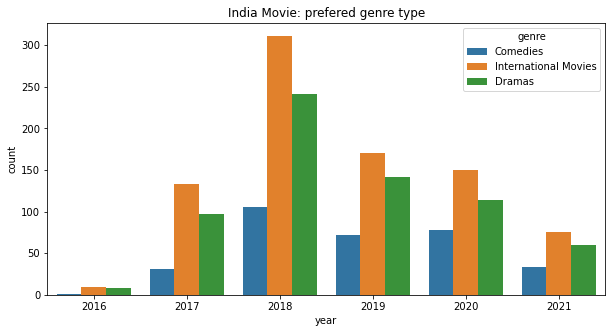

In [164]:
plt.figure(figsize=(10,5))
plt.title("India Movie: prefered genre type")
sns.countplot(data=df_MG, x="year",hue="genre")
plt.show()

## India Movies: prefered actors

In [165]:
maskD = df_Movie_raw[["title","actor"]].duplicated(keep="first")

In [166]:
df_MovieActor = df_Movie_raw[~maskD]

In [167]:
arrYear = df_MovieActor["year"].unique()

In [168]:
arrYear.sort()

In [169]:
arrF = []
for el in arrYear:
    x = df_MovieActor[df_MovieActor["year"]==el]["actor"].value_counts().index[0]
    y = df_MovieActor[df_MovieActor["year"]==el]["actor"].value_counts().values[0]
    temp = [el,x,y]
    arrF.append(temp)

In [170]:
data_fx = pd.DataFrame(arrF, columns=["year","actor","maxMovie"])

In [171]:
data_fx

,year,actor,maxMovie
0,2016,Adil Hussain,2
1,2017,Shah Rukh Khan,14
2,2018,Anupam Kher,19
3,2019,Amitabh Bachchan,10
4,2020,Anupam Kher,10
5,2021,Tusshar Kapoor,8


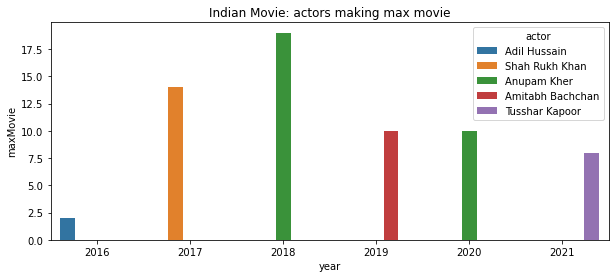

In [172]:
plt.figure(figsize=(10,4))
plt.title("Indian Movie: actors making max movie")
sns.barplot(data=data_fx, x="year", y="maxMovie",hue="actor")
plt.show()

In [173]:
df_MovieActor.head()

,type,title,country,date_added,actor,genre,rating,year
641,Movie,Jeans,India,2021-09-21,Prashanth,Comedies,TV-14,2021
644,Movie,Jeans,India,2021-09-21,Aishwarya Rai Bachchan,Comedies,TV-14,2021
647,Movie,Jeans,India,2021-09-21,Sri Lakshmi,Comedies,TV-14,2021
650,Movie,Jeans,India,2021-09-21,Nassar,Comedies,TV-14,2021
706,Movie,Paranoia,India,2021-09-19,Liam Hemsworth,Thrillers,PG-13,2021


In [174]:
df_MovieActor.duplicated().sum()

0

In [175]:
df_MovieActor["actor"].value_counts().to_frame().head(8)

,actor
Anupam Kher,40
Shah Rukh Khan,34
Naseeruddin Shah,31
Om Puri,29
Akshay Kumar,29
Amitabh Bachchan,28
Paresh Rawal,28
Boman Irani,27


In [176]:
optionB = ["Anupam Kher",
           "Shah Rukh Khan",
           "Naseeruddin Shah",
           "Amitabh Bachchan",
           "Akshay Kumar",
           "Tusshar Kapoor"]

In [177]:
maskE = df_MovieActor["actor"].isin(optionB)

In [178]:
df_MovieActor1 = df_MovieActor[maskE]

In [179]:
df_MovieActor1.head()

,type,title,country,date_added,actor,genre,rating,year
2491,Movie,Anjaam,India,2021-09-02,Shah Rukh Khan,Dramas,TV-14,2021
4719,Movie,C Kkompany,India,2021-08-27,Tusshar Kapoor,Action & Adventure,TV-14,2021
4722,Movie,C Kkompany,India,2021-08-27,Anupam Kher,Action & Adventure,TV-14,2021
4947,Movie,Kucch To Hai,India,2021-08-27,Tusshar Kapoor,Dramas,TV-14,2021
5007,Movie,Kyaa Kool Hai Hum,India,2021-08-27,Tusshar Kapoor,Comedies,TV-MA,2021


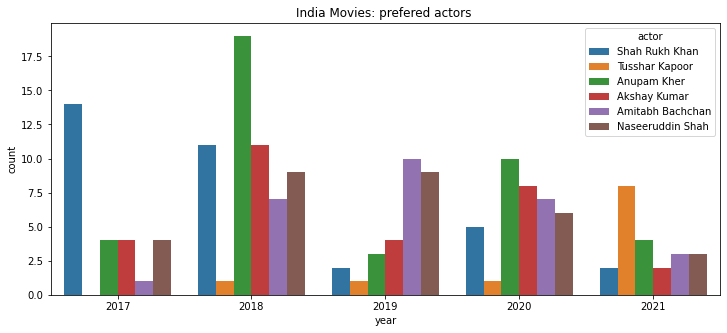

In [180]:
plt.figure(figsize=(12,5))
plt.title("India Movies: prefered actors ")
sns.countplot(data=df_MovieActor1, x="year",hue="actor")
plt.show()

## India Movie: prefered rating type

In [181]:
df_Movie_raw.head()

,type,title,country,date_added,actor,genre,rating,year
641,Movie,Jeans,India,2021-09-21,Prashanth,Comedies,TV-14,2021
642,Movie,Jeans,India,2021-09-21,Prashanth,International Movies,TV-14,2021
643,Movie,Jeans,India,2021-09-21,Prashanth,Romantic Movies,TV-14,2021
644,Movie,Jeans,India,2021-09-21,Aishwarya Rai Bachchan,Comedies,TV-14,2021
645,Movie,Jeans,India,2021-09-21,Aishwarya Rai Bachchan,International Movies,TV-14,2021


In [182]:
df_MR = df_Movie_raw.copy(deep=True)

In [183]:
maskG = df_MR[["title","rating"]].duplicated(keep="first")

In [184]:
df_MR = df_MR[~maskG]

In [185]:
df_MR.head()

,type,title,country,date_added,actor,genre,rating,year
641,Movie,Jeans,India,2021-09-21,Prashanth,Comedies,TV-14,2021
706,Movie,Paranoia,India,2021-09-19,Liam Hemsworth,Thrillers,PG-13,2021
2322,Movie,Angamaly Diaries,India,2021-09-05,Antony Varghese,Action & Adventure,TV-14,2021
2488,Movie,Anjaam,India,2021-09-02,Madhuri Dixit,Dramas,TV-14,2021
2575,Movie,Dhanak,India,2021-09-02,Krrish Chhabria,Comedies,TV-PG,2021


In [186]:
df_MR["rating"].value_counts()

TV-14       541
TV-MA       228
TV-PG       127
PG-13        11
TV-Y7        11
PG            7
NR            6
R             5
TV-G          5
TV-Y7-FV      1
Name: rating, dtype: int64

In [187]:
optionC = ["TV-14","TV-MA","TV-PG"]

In [188]:
maskH = df_MR["rating"].isin(optionC)

In [189]:
df_MR1 = df_MR[maskH]

In [190]:
df_MR1.duplicated().sum()

0

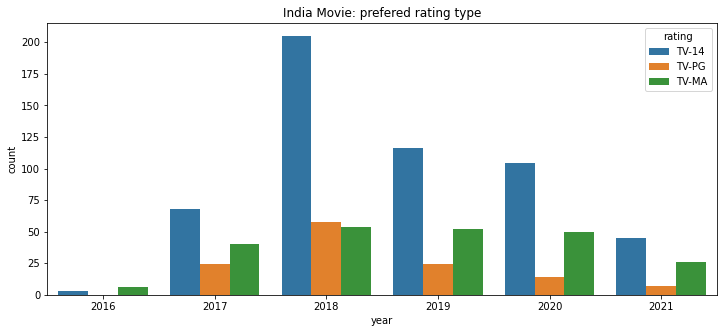

In [191]:
plt.figure(figsize=(12,5))
plt.title("India Movie: prefered rating type")
sns.countplot(data=df_MR1, x="year", hue="rating")
plt.show()

## India TV Show: prefered genre type

In [192]:
df_India.head()

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
88,TV Show,Kota Factory,India,2021-09-24,Mayur More,Romantic TV Shows,TV-MA,2021
89,TV Show,Kota Factory,India,2021-09-24,Mayur More,TV Comedies,TV-MA,2021
90,TV Show,Kota Factory,India,2021-09-24,Jitendra Kumar,International TV Shows,TV-MA,2021
91,TV Show,Kota Factory,India,2021-09-24,Jitendra Kumar,Romantic TV Shows,TV-MA,2021


In [193]:
df_India["type"].value_counts()

Movie      20067
TV Show      999
Name: type, dtype: int64

In [194]:
df_India.duplicated().sum()

0

In [195]:
maskJ = df_India[["title","genre"]].duplicated(keep="first")

In [196]:
df_TVSGenre = df_India[~maskJ]

In [197]:
df_TVSGenre.duplicated().sum()

0

In [198]:
df_TVSGenre = df_TVSGenre[df_TVSGenre["type"]=="TV Show"]

In [199]:
df_TVSGenre.head()

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
88,TV Show,Kota Factory,India,2021-09-24,Mayur More,Romantic TV Shows,TV-MA,2021
89,TV Show,Kota Factory,India,2021-09-24,Mayur More,TV Comedies,TV-MA,2021
989,TV Show,Chhota Bheem,India,2021-09-16,Vatsal Dubey,Kids' TV,TV-Y7,2021
1243,TV Show,Dharmakshetra,India,2021-09-15,Kashmira Irani,International TV Shows,TV-PG,2021


In [200]:
df_TVSGenre["genre"].value_counts().to_frame().head(8)

,genre
International TV Shows,52
TV Dramas,26
TV Comedies,25
Kids' TV,10
Romantic TV Shows,10
Crime TV Shows,9
TV Action & Adventure,5
TV Horror,5


In [201]:
optionD = ["International TV Shows",
           "TV Comedies",
           "TV Dramas"]

In [202]:
maskL = df_TVSGenre["genre"].isin(optionD)

In [203]:
df_TVSGenre1 = df_TVSGenre[maskL]

In [204]:
df_TVSGenre1.head()

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
89,TV Show,Kota Factory,India,2021-09-24,Mayur More,TV Comedies,TV-MA,2021
1243,TV Show,Dharmakshetra,India,2021-09-15,Kashmira Irani,International TV Shows,TV-PG,2021
1244,TV Show,Dharmakshetra,India,2021-09-15,Kashmira Irani,TV Dramas,TV-PG,2021
30010,TV Show,Bombay Begums,India,2021-03-08,Pooja Bhatt,International TV Shows,TV-MA,2021


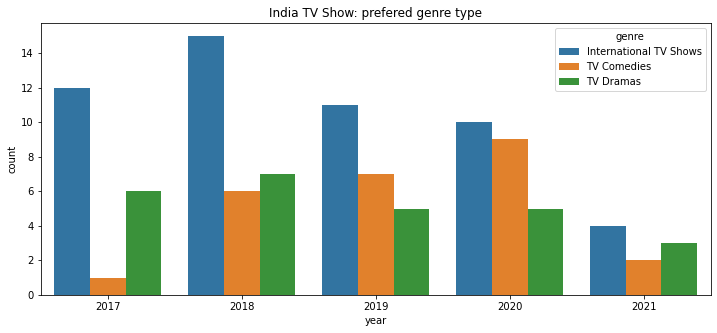

In [205]:
plt.figure(figsize=(12,5))
plt.title("India TV Show: prefered genre type")
sns.countplot(data=df_TVSGenre1, x="year", hue="genre")
plt.show()

## India TV show: prefered actors

In [206]:
df_India.head(3)

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
88,TV Show,Kota Factory,India,2021-09-24,Mayur More,Romantic TV Shows,TV-MA,2021
89,TV Show,Kota Factory,India,2021-09-24,Mayur More,TV Comedies,TV-MA,2021


In [207]:
df_TVSactor_raw = df_India[df_India["type"]=="TV Show"]

In [208]:
maskM = df_TVSactor_raw[["title","actor"]].duplicated(keep="first")

In [209]:
df_TVSactor = df_TVSactor_raw[~maskM]

In [210]:
df_TVSactor.duplicated().sum()

0

In [211]:
df_TVSactor["actor"].value_counts().to_frame().head(20)

,actor
Nishka Raheja,3
Rajesh Kava,3
Anjali,2
Manish Chaudhary,2
Jitendra Joshi,2
Aranya Kaur,2
Prakash Raj,2
Siddhant Karnick,2
Mona Ambegaonkar,2
Rasika Dugal,2


## India TV Show: prefered rating type

In [212]:
df_TVrating_raw = df_India[df_India["type"]=="TV Show"]

In [213]:
maskN = df_TVrating_raw[["title","rating"]].duplicated(keep="first")

In [214]:
df_TVrating = df_TVrating_raw[~maskN]

In [215]:
df_TVrating.duplicated().sum()

0

In [216]:
df_TVrating["rating"].value_counts()

TV-MA    26
TV-14    21
TV-PG     8
TV-Y      5
TV-Y7     4
TV-G      1
Name: rating, dtype: int64

In [217]:
optionE = ["TV-MA","TV-14","TV-PG"]

In [218]:
maskP = df_TVrating["rating"].isin(optionE)

In [219]:
df_TVrating1 = df_TVrating[maskP]

In [220]:
df_TVrating1.duplicated().sum()

0

In [221]:
df_TVrating1.head()

,type,title,country,date_added,actor,genre,rating,year
87,TV Show,Kota Factory,India,2021-09-24,Mayur More,International TV Shows,TV-MA,2021
1243,TV Show,Dharmakshetra,India,2021-09-15,Kashmira Irani,International TV Shows,TV-PG,2021
6997,TV Show,Navarasa,India,2021-08-06,Suriya,TV Shows,TV-MA,2021
22884,TV Show,Lava Ka Dhaava,India,2021-05-05,Jaaved Jaaferi,Reality TV,TV-PG,2021
30010,TV Show,Bombay Begums,India,2021-03-08,Pooja Bhatt,International TV Shows,TV-MA,2021


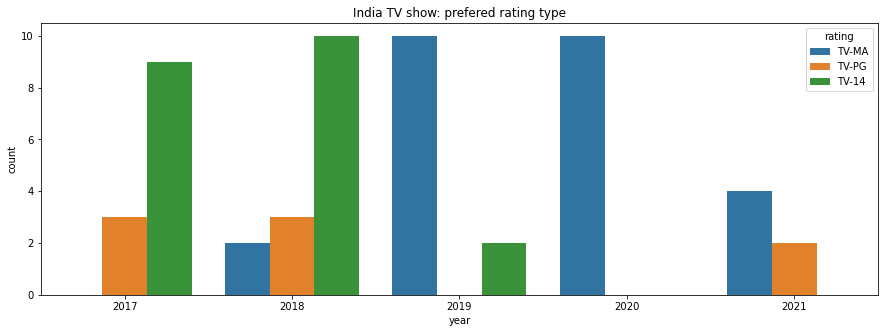

In [222]:
plt.figure(figsize=(15,5))
plt.title("India TV show: prefered rating type")
sns.countplot(data=df_TVrating1, x="year", hue="rating")
plt.show()

## Extracting data for USA

In [223]:
df_final.head(3)

,show_id,type,title,date_added,release_year,rating,duration,description,director,actor,genre,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NA,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Dramas,South Africa


In [224]:
dfUSA_raw = df_final.copy(deep=True)

In [225]:
dfUSA_raw = dfUSA_raw[dfUSA_raw["country"]=="United States"]

In [226]:
dfUSA_raw.duplicated().sum()

25

In [227]:
dfUSA_raw.replace("NA",np.nan,inplace=True)

In [228]:
dfUSA_raw.isnull().sum()

show_id             0
type                0
title               0
date_added         84
release_year        0
rating              3
duration            0
description         0
director        13079
actor             743
genre               0
country             0
dtype: int64

In [229]:
dfUSA_raw.dropna(inplace=True)

In [230]:
dfUSA_raw.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
director        0
actor           0
genre           0
country         0
dtype: int64

In [231]:
dfUSA_raw.duplicated().sum()

25

In [232]:
dfUSA_raw.drop_duplicates(keep="first",inplace=True)

In [233]:
dfUSA = dfUSA_raw.copy(deep=True)

In [234]:
dfUSA["year"]=dfUSA["date_added"].dt.year.astype("int")

In [235]:
dfUSA.drop(columns=["description"],inplace=True)

In [236]:
dfUSA.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
191,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,International Movies,United States,2021
197,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,2021
203,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Independent Movies,United States,2021


## USA: Movies vs TV show

In [237]:
dfUS = dfUSA.copy(deep=True)

In [238]:
maskQ = dfUS[["title","year"]].duplicated()

In [239]:
dfUS_A = dfUS[~maskQ]

In [240]:
dfUS_A.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
331,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,Theodore Melfi,Melissa McCarthy,Comedies,United States,2021
674,s28,Movie,Grown Ups,2021-09-20,2010,PG-13,103 min,Dennis Dugan,Adam Sandler,Comedies,United States,2021
685,s29,Movie,Dark Skies,2021-09-19,2013,PG-13,97 min,Scott Stewart,Keri Russell,Horror Movies,United States,2021
705,s30,Movie,Paranoia,2021-09-19,2013,PG-13,106 min,Robert Luketic,Liam Hemsworth,Thrillers,United States,2021


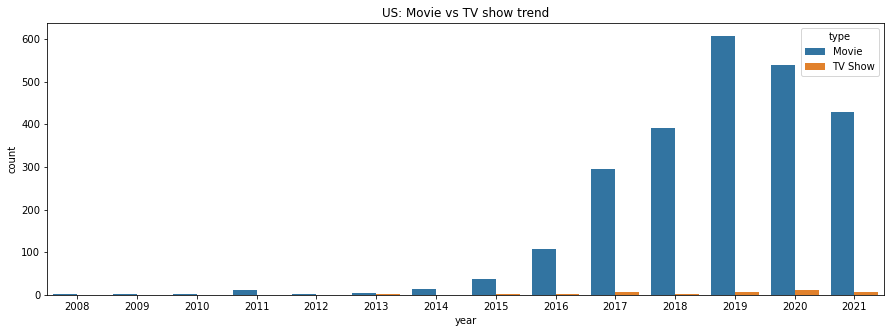

In [241]:
plt.figure(figsize=(15,5))
plt.title("US: Movie vs TV show trend")
sns.countplot(data=dfUS_A, x="year", hue="type")
plt.show()

In [242]:
dfUS_A["type"].value_counts()

Movie      2444
TV Show      41
Name: type, dtype: int64

## USA Movie: prefered genre type

In [243]:
dfUS.head(3)

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
191,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,International Movies,United States,2021


In [244]:
dfUSmovie = dfUS[dfUS["type"]=="Movie"]

In [245]:
dfUSmovie.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
191,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,International Movies,United States,2021
197,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,2021
203,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Independent Movies,United States,2021


In [246]:
maskR = dfUSmovie[["title","genre"]].duplicated()

In [247]:
dfUS_genre = dfUSmovie[~maskR]

In [248]:
dfUS_genre.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
191,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,International Movies,United States,2021
331,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,Theodore Melfi,Melissa McCarthy,Comedies,United States,2021
332,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,Theodore Melfi,Melissa McCarthy,Dramas,United States,2021


In [249]:
dfUS_genre["genre"].value_counts()

Dramas                      827
Comedies                    667
Action & Adventure          401
Independent Movies          389
Children & Family Movies    369
Thrillers                   292
Documentaries               254
Romantic Movies             224
Stand-Up Comedy             209
Horror Movies               199
Sci-Fi & Fantasy            176
International Movies        134
Music & Musicals            128
Sports Movies                91
Classic Movies               74
Cult Movies                  51
LGBTQ Movies                 49
Faith & Spirituality         40
Movies                       10
Anime Features                6
Name: genre, dtype: int64

In [250]:
bucketA = ["Dramas","Comedies","Independent Movies",
           "Children & Family Movies","Action & Adventure",
           "Documentaries","Stand-Up Comedy","Thrillers",
           "Romantic Movies","Horror Movies"]

In [251]:
maskS = dfUS_genre["genre"].isin(bucketA)

In [252]:
dfUS_genre1 = dfUS_genre[maskS]

In [253]:
dfUS_genre1.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
331,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,Theodore Melfi,Melissa McCarthy,Comedies,United States,2021
332,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,Theodore Melfi,Melissa McCarthy,Dramas,United States,2021
674,s28,Movie,Grown Ups,2021-09-20,2010,PG-13,103 min,Dennis Dugan,Adam Sandler,Comedies,United States,2021


<AxesSubplot:xlabel='year', ylabel='count'>

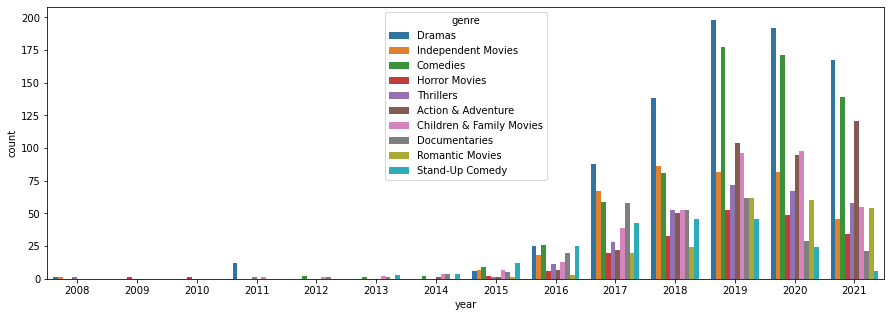

In [254]:
plt.figure(figsize=(15,5))
sns.countplot(data=dfUS_genre1, x="year", hue="genre")

In [255]:
ARR_year = [2015,2016,2017,2018,2019,2020,2021]

In [256]:
maskT = dfUS_genre1["year"].isin(ARR_year)

In [257]:
dfUS_genre2 = dfUS_genre1[maskT]

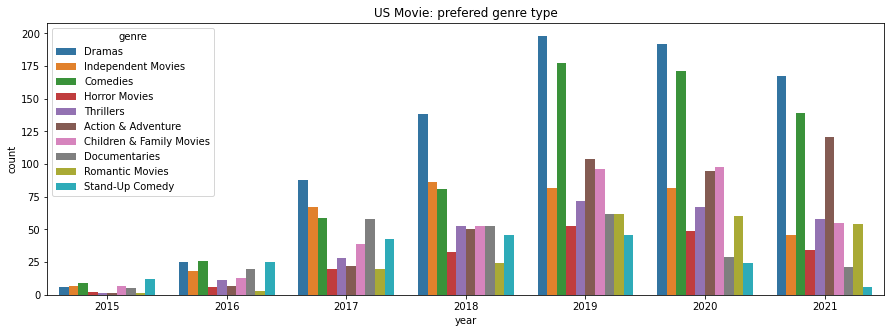

In [258]:
plt.figure(figsize=(15,5))
plt.title("US Movie: prefered genre type")
sns.countplot(data=dfUS_genre2, x="year", hue="genre")
plt.show()

## US Movie: prefered actors

In [259]:
dfUSmovie.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
191,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,International Movies,United States,2021
197,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,2021
203,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Independent Movies,United States,2021


In [260]:
maskAA = dfUSmovie[["title","actor"]].duplicated()

In [261]:
dfUS_actor = dfUSmovie[~maskAA]

In [262]:
dfUS_actor["actor"].value_counts().to_frame().head(20)

,actor
Samuel L. Jackson,21
Adam Sandler,20
James Franco,19
Nicolas Cage,18
Morgan Freeman,15
Molly Shannon,15
Fred Tatasciore,15
Seth Rogen,15
Tara Strong,15
Bruce Willis,15


In [263]:
bucketB = ["Adam Sandler","Samuel L. Jackson","Morgan Freeman",
           "Nicolas Cage","James Franco","Molly Shannon",
           "Chris Rock","Fred Tatasciore"]

In [264]:
maskAB = dfUS_actor["actor"].isin(bucketB)

In [265]:
dfUS_actor1 = dfUS_actor[maskAB]

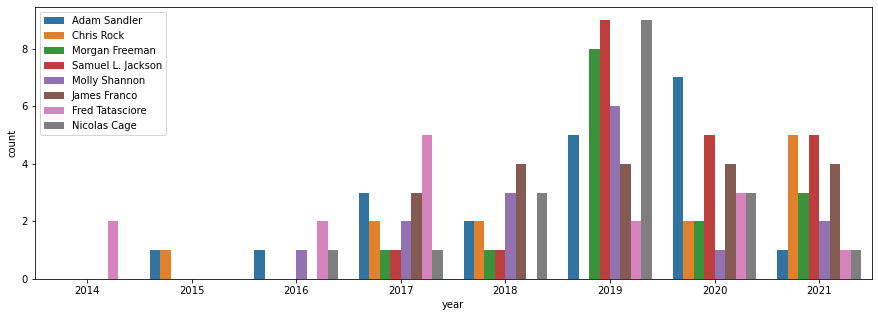

In [266]:
plt.figure(figsize=(15,5))
sns.countplot(data=dfUS_actor1, x="year", hue="actor")
plt.legend(loc="upper left")

In [267]:
ARRyearA = [2015,2016,2017,2018,2019,2020,2021]

In [268]:
maskAC = dfUS_actor1["year"].isin(ARRyearA)

In [269]:
dfUS_actor2 = dfUS_actor1[maskAC]

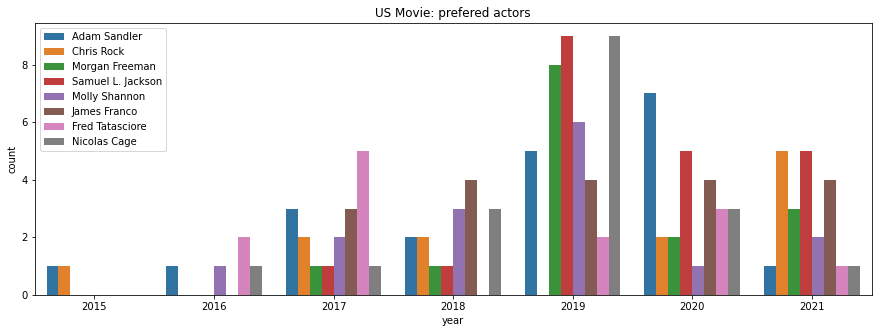

In [270]:
plt.figure(figsize=(15,5))
plt.title("US Movie: prefered actors")
sns.countplot(data=dfUS_actor2, x="year", hue="actor")
plt.legend(loc="upper left")
plt.show()

## US Movie: prefered rating type

In [271]:
dfUSmovie.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
191,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,International Movies,United States,2021
197,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,2021
203,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Independent Movies,United States,2021


In [272]:
dfUSmovie["rating"].value_counts()

R           13464
PG-13        9127
TV-MA        8048
PG           5997
TV-14        2809
TV-PG        1737
TV-Y          957
G             905
TV-Y7         815
TV-G          509
NR            429
TV-Y7-FV       34
UR             20
Name: rating, dtype: int64

In [273]:
maskAD = dfUSmovie[["title","rating"]].duplicated()

In [274]:
dfUSmovie_rating = dfUSmovie[~maskAD]

In [275]:
dfUSmovie_rating.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
331,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,Theodore Melfi,Melissa McCarthy,Comedies,United States,2021
674,s28,Movie,Grown Ups,2021-09-20,2010,PG-13,103 min,Dennis Dugan,Adam Sandler,Comedies,United States,2021
685,s29,Movie,Dark Skies,2021-09-19,2013,PG-13,97 min,Scott Stewart,Keri Russell,Horror Movies,United States,2021
705,s30,Movie,Paranoia,2021-09-19,2013,PG-13,106 min,Robert Luketic,Liam Hemsworth,Thrillers,United States,2021


In [276]:
bucketC = ["R","TV-MA","PG-13","PG","TV-14","TV-PG"]

In [277]:
maskAE = dfUSmovie_rating["rating"].isin(bucketC)

In [278]:
dfUSmovie_rating1 = dfUSmovie_rating[maskAE]

<AxesSubplot:xlabel='year', ylabel='count'>

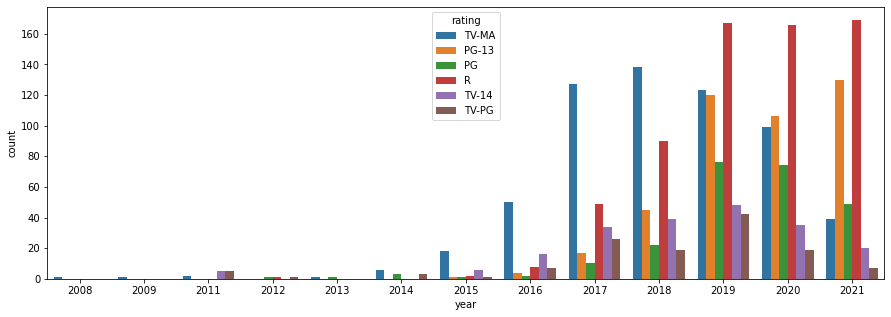

In [279]:
plt.figure(figsize=(15,5))
sns.countplot(data=dfUSmovie_rating1, x="year", hue="rating")

In [280]:
ARRyearA = [2015,2016,2017,2018,2019,2020,2021]

In [281]:
maskAF = dfUSmovie_rating1["year"].isin(ARRyearA)

In [282]:
dfUSmovie_rating2 = dfUSmovie_rating1[maskAF]

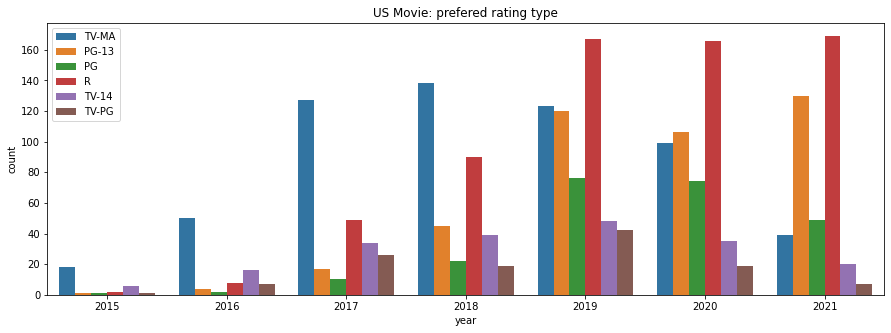

In [283]:
plt.figure(figsize=(15,5))
plt.title("US Movie: prefered rating type")
sns.countplot(data=dfUSmovie_rating2, x="year", hue="rating")
plt.legend(loc="upper left")
plt.show()

## US TV Show: prefered genre type

In [284]:
dfUS.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
185,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,2021
191,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Kofi Ghanaba,International Movies,United States,2021
197,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,2021
203,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,Haile Gerima,Oyafunmike Ogunlano,Independent Movies,United States,2021


In [285]:
dfUStvSHOW = dfUS[dfUS["type"]=="TV Show"]

In [286]:
dfUStvSHOW.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
9316,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,Crime TV Shows,United States,2021
9317,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Action & Adventure,United States,2021
9318,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Sci-Fi & Fantasy,United States,2021
9319,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Candice Patton,Crime TV Shows,United States,2021
9320,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Candice Patton,TV Action & Adventure,United States,2021


In [287]:
dfUStvSHOW.duplicated().sum()

0

In [288]:
maskAG = dfUStvSHOW[["title","genre"]].duplicated(keep="first")

In [289]:
dfUStvSHOW_genre = dfUStvSHOW[~maskAG]

In [290]:
dfUStvSHOW_genre.head(5)

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
9316,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,Crime TV Shows,United States,2021
9317,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Action & Adventure,United States,2021
9318,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Sci-Fi & Fantasy,United States,2021
17456,s677,TV Show,Riverdale,2021-06-19,2019,TV-14,4 Seasons,Rob Seidenglanz,K.J. Apa,Crime TV Shows,United States,2021
17457,s677,TV Show,Riverdale,2021-06-19,2019,TV-14,4 Seasons,Rob Seidenglanz,K.J. Apa,TV Dramas,United States,2021


In [291]:
dfUStvSHOW_genre["genre"].value_counts()

Crime TV Shows                  10
TV Dramas                       10
TV Comedies                     10
TV Action & Adventure            9
International TV Shows           8
Docuseries                       7
Stand-Up Comedy & Talk Shows     7
Kids' TV                         5
TV Sci-Fi & Fantasy              3
Romantic TV Shows                2
Spanish-Language TV Shows        2
TV Mysteries                     2
TV Horror                        2
British TV Shows                 2
TV Thrillers                     1
Classic & Cult TV                1
Korean TV Shows                  1
TV Shows                         1
Reality TV                       1
Science & Nature TV              1
Name: genre, dtype: int64

In [292]:
bucketD = ["TV Comedies","TV Dramas","Stand-Up Comedy & Talk Shows","Crime TV Shows",
           "TV Action & Adventure","Docuseries","TV Sci-Fi & Fantasy","TV Mysteries"]

In [293]:
maskAH = dfUStvSHOW_genre["genre"].isin(bucketD)

In [294]:
dfUStvSHOW_genre1 = dfUStvSHOW_genre[maskAH]

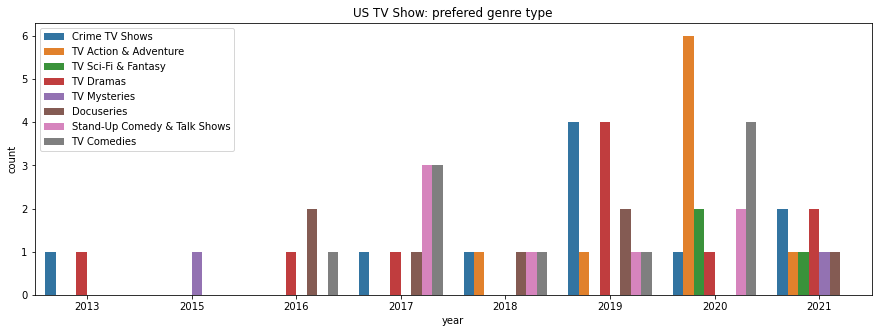

In [295]:
plt.figure(figsize=(15,5))
plt.title("US TV Show: prefered genre type")
sns.countplot(data=dfUStvSHOW_genre1, x="year", hue="genre")
plt.legend(loc="upper left")
plt.show()

## US TV show: prefered actors

In [296]:
dfUStvSHOW.head()

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
9316,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,Crime TV Shows,United States,2021
9317,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Action & Adventure,United States,2021
9318,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Sci-Fi & Fantasy,United States,2021
9319,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Candice Patton,Crime TV Shows,United States,2021
9320,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Candice Patton,TV Action & Adventure,United States,2021


In [297]:
dfUStvSHOW[["title","actor"]].duplicated().sum()

545

In [298]:
maskAI = dfUStvSHOW[["title","actor"]].duplicated()

In [299]:
dfUStvSHOW_actor = dfUStvSHOW[~maskAI]

In [300]:
dfUStvSHOW_actor["actor"].value_counts().to_frame().head(20)

,actor
Dave Chappelle,2
Keiynan Lonsdale,2
Grant Gustin,1
Olivia Colman,1
Daniel Kaluuya,1
Miles Jupp,1
Lee Ingleby,1
Freddie Fox,1
James Faulkner,1
Taron Egerton,1


## US TV show: prefered rating type

In [301]:
dfUStvSHOW.head(3)

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country,year
9316,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,Crime TV Shows,United States,2021
9317,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Action & Adventure,United States,2021
9318,s381,TV Show,The Flash,2021-07-28,2021,TV-14,7 Seasons,Glen Winter,Grant Gustin,TV Sci-Fi & Fantasy,United States,2021


In [302]:
dfUStvSHOW[["title","rating"]].duplicated().sum()

853

In [303]:
maskAJ = dfUStvSHOW[["title","rating"]].duplicated()

In [304]:
dfUStvSHOW_rating = dfUStvSHOW[~maskAJ]

In [305]:
dfUStvSHOW_rating["rating"].value_counts()

TV-MA    17
TV-14    12
TV-PG     6
TV-G      2
TV-Y      2
TV-Y7     2
Name: rating, dtype: int64

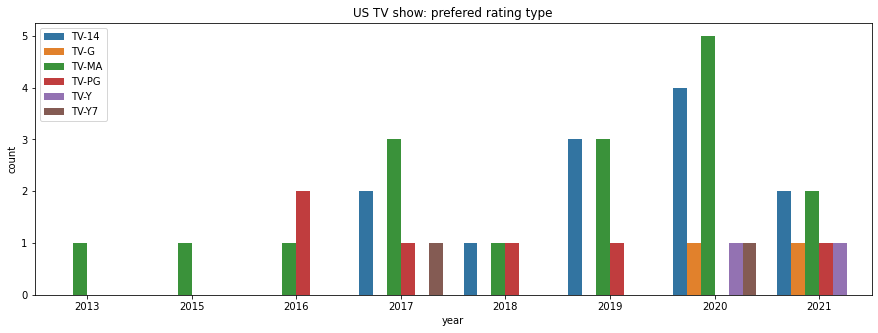

In [306]:
plt.figure(figsize=(15,5))
plt.title("US TV show: prefered rating type")
sns.countplot(data=dfUStvSHOW_rating, x="year", hue="rating")
plt.legend(loc="upper left")
plt.show()

## Overall Movie vs TV Shows trend

In [307]:
df_final.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,actor,genre,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NA,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NA,Khosi Ngema,International TV Shows,South Africa


In [308]:
dfFinal = df_final.copy(deep=True)

In [309]:
dfFinal.drop(columns=["description"],inplace=False)

,show_id,type,title,date_added,release_year,rating,duration,director,actor,genre,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Kirsten Johnson,NA,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,NA,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,NA,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,NA,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,NA,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...,...,...,...,...,...,...
201954,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,International Movies,India
201955,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Anita Shabdish,Music & Musicals,India
201956,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,Dramas,India
201957,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,Mozez Singh,Chittaranjan Tripathy,International Movies,India


In [310]:
dfFinal.replace("NA",np.nan,inplace=True)

In [311]:
dfFinal.duplicated().sum()

55

In [312]:
dfFinal.drop_duplicates(keep="first",inplace=True)

In [313]:
dfFinal["date_added"].isna().sum()

158

In [314]:
dfFinal.dropna(inplace=True)

In [315]:
dfFinal["year_added"]=dfFinal["date_added"].dt.year.astype("int")

In [316]:
dfFinal[["title","date_added"]].duplicated().sum()

137681

In [317]:
maskAK = dfFinal[["title","date_added"]].duplicated()

In [318]:
dfFinal = dfFinal[~maskAK]

In [319]:
dfFinal

,show_id,type,title,date_added,release_year,rating,duration,description,director,actor,genre,country,year_added
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
323,s9,TV Show,The Great British Baking Show,2021-09-24,2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,Andy Devonshire,Mel Giedroyc,British TV Shows,United Kingdom,2021
331,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Melissa McCarthy,Comedies,United States,2021
431,s13,Movie,Je Suis Karl,2021-09-23,2021,TV-MA,127 min,After most of her family is murdered in a terr...,Christian Schwochow,Luna Wedler,Dramas,Germany,2021
641,s25,Movie,Jeans,2021-09-21,1998,TV-14,166 min,When the father of the man she loves insists t...,S. Shankar,Prashanth,Comedies,India,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201834,s8802,Movie,Zinzana,2016-03-09,2015,TV-MA,96 min,Recovering alcoholic Talal wakes up inside a s...,Majid Al Ansari,Ali Suliman,Dramas,United Arab Emirates,2016
201870,s8803,Movie,Zodiac,2019-11-20,2007,R,158 min,"A political cartoonist, a crime reporter and a...",David Fincher,Mark Ruffalo,Cult Movies,United States,2019
201903,s8805,Movie,Zombieland,2019-11-01,2009,R,88 min,Looking to survive in a world taken over by zo...,Ruben Fleischer,Jesse Eisenberg,Comedies,United States,2019
201917,s8806,Movie,Zoom,2020-01-11,2006,PG,88 min,"Dragged from civilian life, a former superhero...",Peter Hewitt,Tim Allen,Children & Family Movies,United States,2020


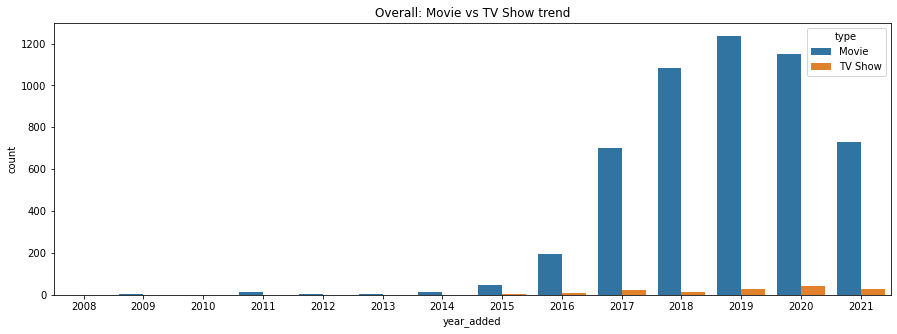

In [320]:
plt.figure(figsize=(15,5))
plt.title("Overall: Movie vs TV Show trend")
sns.countplot(data=dfFinal, x="year_added", hue="type")
plt.show()

## Overall Netflix Movie trend country wise

In [321]:
dfFinalMovie = dfFinal[dfFinal["type"]=="Movie"]

In [322]:
dfFinalMovie.duplicated().sum()

0

In [323]:
dfFinalMovie[["title","country"]].duplicated().sum()

0

In [324]:
dfFinalMovie["country"].value_counts().to_frame().head(10)

,country
United States,2099
India,902
United Kingdom,325
Canada,162
France,140
Spain,115
Egypt,95
Nigeria,85
Indonesia,82
Japan,81


In [325]:
bucketE = ["United States","India","United Kingdom","Canada","France","Spain"]

In [326]:
maskAL = dfFinalMovie["country"].isin(bucketE)

In [327]:
dfFinalMovie1 = dfFinalMovie[maskAL]

In [328]:
dfFinalMovie1.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,actor,genre,country,year_added
179,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Haile Gerima,Kofi Ghanaba,Dramas,United States,2021
331,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Melissa McCarthy,Comedies,United States,2021
641,s25,Movie,Jeans,2021-09-21,1998,TV-14,166 min,When the father of the man she loves insists t...,S. Shankar,Prashanth,Comedies,India,2021
674,s28,Movie,Grown Ups,2021-09-20,2010,PG-13,103 min,Mourning the loss of their beloved junior high...,Dennis Dugan,Adam Sandler,Comedies,United States,2021
685,s29,Movie,Dark Skies,2021-09-19,2013,PG-13,97 min,A family’s idyllic suburban life shatters when...,Scott Stewart,Keri Russell,Horror Movies,United States,2021


<AxesSubplot:xlabel='year_added', ylabel='count'>

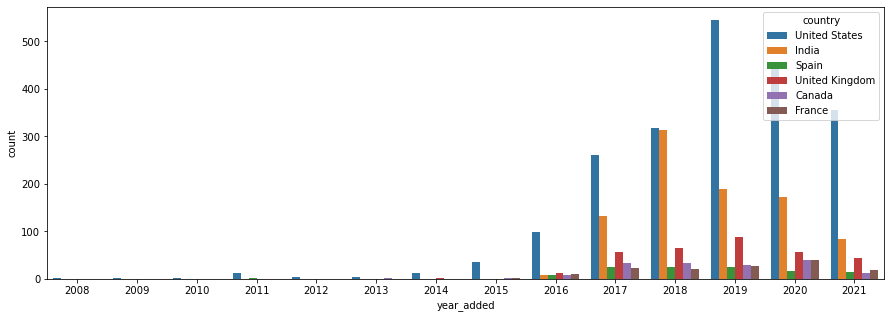

In [329]:
plt.figure(figsize=(15,5))
sns.countplot(data=dfFinalMovie1, x="year_added", hue="country")

In [330]:
bucketF = [2015,2016,2017,2018,2019,2020,2021]

In [331]:
maskAM = dfFinalMovie1["year_added"].isin(bucketF)

In [332]:
dfFinalMovie2 = dfFinalMovie1[maskAM]

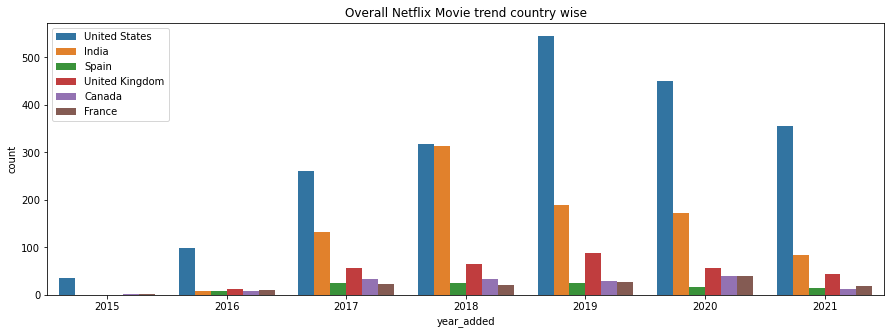

In [333]:
plt.figure(figsize=(15,5))
plt.title("Overall Netflix Movie trend country wise")
sns.countplot(data=dfFinalMovie2, x="year_added", hue="country")
plt.legend(loc="upper left")
plt.show()

## Overall Netflix TV Show trend country wise

In [334]:
dfFinalTVshow = dfFinal[dfFinal["type"]=="TV Show"]

In [335]:
dfFinalTVshow.duplicated().sum()

0

In [336]:
dfFinalTVshow[["title","country"]].duplicated().sum()

0

In [337]:
dfFinalTVshow[["title","date_added"]].duplicated().sum()

0

In [338]:
dfFinalTVshow["country"].value_counts()

United States     31
United Kingdom    22
South Korea       11
Japan             10
India              8
Taiwan             8
Spain              7
France             6
Turkey             5
Thailand           5
Nigeria            4
Italy              4
Brazil             4
Canada             4
Mexico             3
China              2
Philippines        2
Colombia           2
Denmark            2
Russia             1
Belgium            1
Argentina          1
Saudi Arabia       1
Poland             1
Australia          1
Pakistan           1
Name: country, dtype: int64

In [339]:
bucketG = ["United States","United Kingdom","South Korea","Japan","India","Taiwan"]

In [340]:
maskAN = dfFinalTVshow["country"].isin(bucketG)

In [341]:
dfFinalTVshow1 = dfFinalTVshow[maskAN]

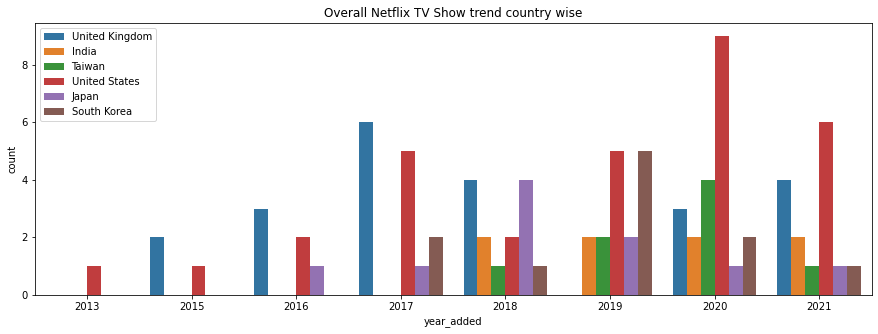

In [342]:
plt.figure(figsize=(15,5))
plt.title("Overall Netflix TV Show trend country wise")
sns.countplot(data=dfFinalTVshow1, x="year_added", hue="country")
plt.legend(loc="upper left")
plt.show()

## Understanding what content is available in different countries

In [343]:
dataFinal = df_final.copy(deep=True)

In [344]:
dataFinal = dataFinal[dataFinal["type"]=="Movie"]

In [345]:
dataFinal.duplicated().sum()

55

In [346]:
dataFinal.replace("NA", np.nan,inplace=True)

In [347]:
dataFinal[["country","title","genre"]].duplicated().sum()

128949

In [348]:
maskAO = dataFinal[["country","title","genre"]].duplicated()

In [349]:
dataFinal1 = dataFinal[~maskAO]

In [350]:
dataFinal1.duplicated().sum()

0

In [351]:
dataFinal1["country"].value_counts().to_frame().head(6)

,country
United States,5019
India,2606
United Kingdom,1069
France,726
Canada,633
Spain,416


In [352]:
bucketH = ["United States","India","United Kingdom","France","Canada","Spain"]

In [353]:
maskAAH = dataFinal1["country"].isin(bucketH)

In [354]:
dataFinal2 = dataFinal1[maskAAH]

In [355]:
dataFinal2["genre"].value_counts()

Dramas                      2019
International Movies        1607
Comedies                    1286
Documentaries                774
Independent Movies           768
Action & Adventure           716
Thrillers                    576
Children & Family Movies     574
Romantic Movies              441
Horror Movies                320
Music & Musicals             307
Sci-Fi & Fantasy             277
Stand-Up Comedy              251
Sports Movies                181
Classic Movies               115
LGBTQ Movies                  83
Cult Movies                   72
Faith & Spirituality          60
Movies                        35
Anime Features                 7
Name: genre, dtype: int64

In [356]:
bucketJ = ["Dramas","International Movies","Comedies",
           "Documentaries","Independent Movies","Action & Adventure",
           "Thrillers","Children & Family Movies","Romantic Movies"]

In [357]:
maskAAJ = dataFinal2["genre"].isin(bucketJ)

In [358]:
dataFinal3 = dataFinal2[maskAAJ]

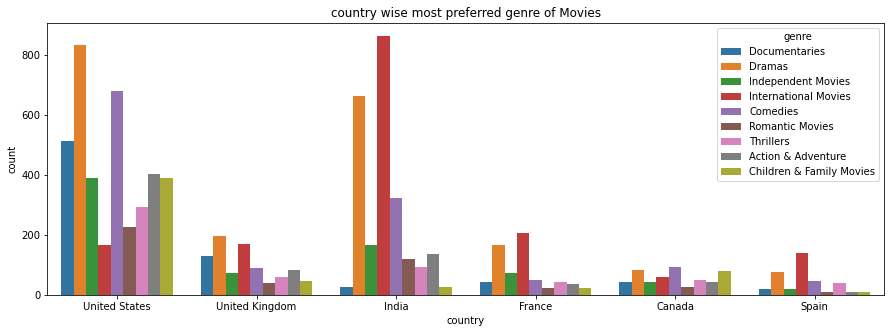

In [359]:
plt.figure(figsize=(15,5))
plt.title("country wise most preferred genre of Movies")
sns.countplot(data=dataFinal3, x="country", hue="genre")
plt.show()